In [22]:

#import les librairies et charge les datas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
import sklearn.datasets as datasets

data = datasets.fetch_california_housing()

# creation du dataframe pandas 
df = pd.DataFrame(data=data["data"], columns=data["feature_names"])

df["price"] = data["target"]
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [23]:
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [24]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [25]:
df.corr()["price"].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
price         1.000000
Name: price, dtype: float64

In [42]:
X = df.drop("price", axis=1).values
y = df["price"].values
print(y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=12)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)




(20640,)
(15480, 8)
(15480,)
(5160,)


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout


In [44]:
model = Sequential()

model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation='sigmoid'))

In [46]:
model.compile(loss="binary_crossentropy", optimizer="adam")


In [47]:
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_test,y_test), verbose=1)

Epoch 1/200
484/484 [==============================] - 3s 3ms/step - loss: -1497.9755 - val_loss: -6283.1919
Epoch 2/200
484/484 [==============================] - 1s 2ms/step - loss: -24121.4629 - val_loss: -52755.6836
Epoch 3/200
484/484 [==============================] - 1s 2ms/step - loss: -101480.3203 - val_loss: -167232.9688
Epoch 4/200
484/484 [==============================] - 1s 2ms/step - loss: -255106.2031 - val_loss: -368513.6562
Epoch 5/200
484/484 [==============================] - 1s 2ms/step - loss: -497647.4062 - val_loss: -663758.5625
Epoch 6/200
484/484 [==============================] - 1s 3ms/step - loss: -837481.2500 - val_loss: -1062416.1250
Epoch 7/200
484/484 [==============================] - 1s 3ms/step - loss: -1281468.1250 - val_loss: -1570452.5000
Epoch 8/200
484/484 [==============================] - 1s 3ms/step - loss: -1837726.6250 - val_loss: -2197785.5000
Epoch 9/200
484/484 [==============================] - 1s 3ms/step - loss: -2510756.2500 - val_lo

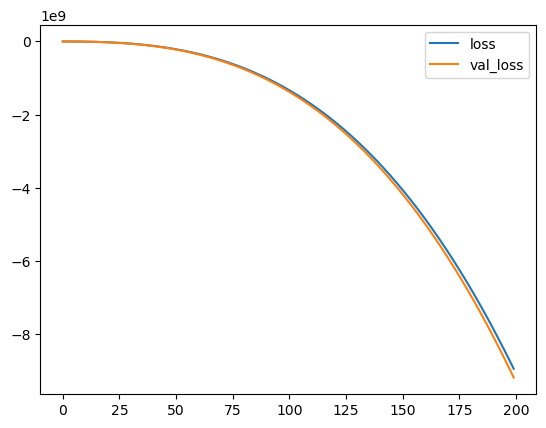

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot();

In [70]:
test = df.drop("price",axis=1)
test
model.predict(test)

645/645 [==============================] - 1s 2ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix
# https://en.wikipedia.org/wiki/Precision_and_recall


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)